# DATA UNDERSTANDING

In [1]:
import pandas as pd

In [20]:
file_path =(r"C:\Users\rishab\Downloads\Supermart Grocery Sales - Retail Analytics Dataset.csv")
df = pd.read_csv(file_path)

In [3]:
print("Shape:", df.shape)

Shape: (9994, 11)


In [4]:
print("\nColumns:", df.columns)


Columns: Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')


In [5]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object


In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [7]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


# Data Cleaning and Preprocessing

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)

In [21]:
print(df['Order Date'].unique()[:10])

['11-08-2017' '06-12-2017' '10-11-2016' '06-09-2015' '4/15/2018'
 '12-05-2017' '11/22/2016' '11-11-2015' '5/13/2015' '8/27/2015']


In [23]:
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [24]:
df[['Order Date', 'Order Day', 'Order Month', 'Order Year']].head()

,Order Date,Order Day,Order Month,Order Year
0,2017-08-11,11,8,2017
1,2017-08-11,11,8,2017
2,2017-12-06,6,12,2017
3,2016-11-10,10,11,2016
4,2016-11-10,10,11,2016


In [29]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [30]:
print("New shape of dataset:", df.shape)

New shape of dataset: (9994, 14)


In [31]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,12,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,10,11,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,10,11,2016


In [35]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-08-11,2,1254,0.12,401.28,0,11,8,2017
1,OD2,Sudha,1,13,8,2017-08-11,3,749,0.18,149.80,0,11,8,2017
2,OD3,Hussain,3,0,13,2017-12-06,4,2360,0.21,165.20,0,6,12,2017
3,OD4,Jackson,4,12,4,2016-11-10,3,896,0.25,89.60,0,10,11,2016
4,OD5,Ridhesh,3,18,12,2016-11-10,3,2355,0.26,918.45,0,10,11,2016


# EDA (Exploratory Data Analysis)

* Total Sales by Category

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

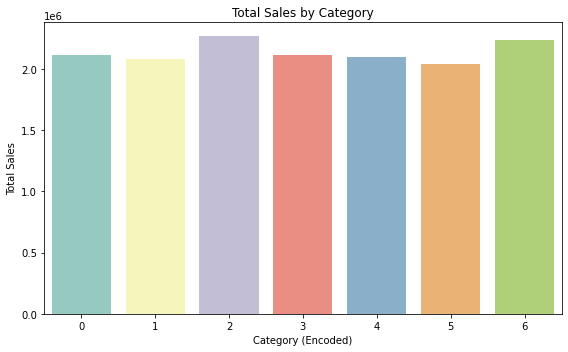

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Set3')
plt.title('Total Sales by Category')
plt.xlabel('Category (Encoded)')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

*  Top 5 Cities by Total Sales

In [50]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)

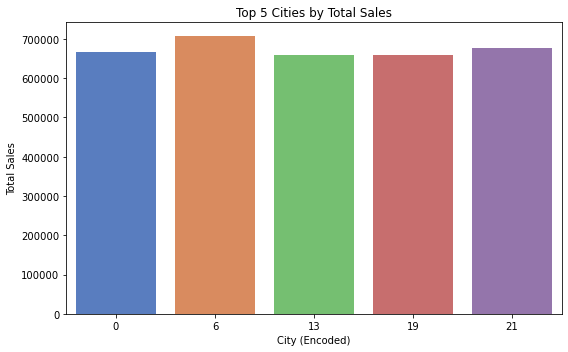

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='muted')
plt.title('Top 5 Cities by Total Sales')
plt.xlabel('City (Encoded)')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

* Sales Trend Over Time

In [52]:
sales_trend = df.groupby('Order Date')['Sales'].sum()

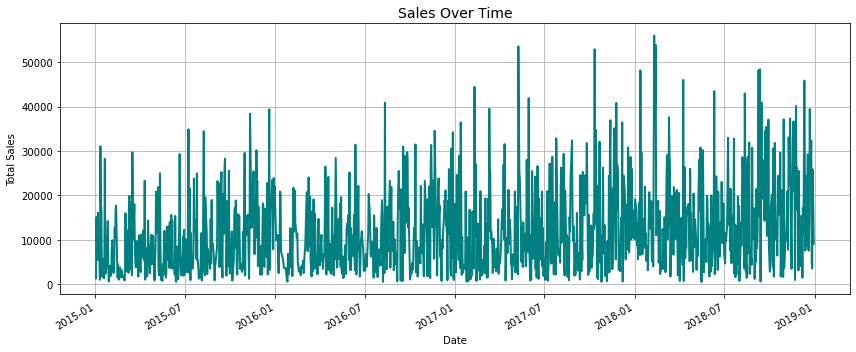

In [53]:
plt.figure(figsize=(12, 5))
sales_trend.plot(color='teal', linewidth=2)
plt.title('Sales Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Heatmap

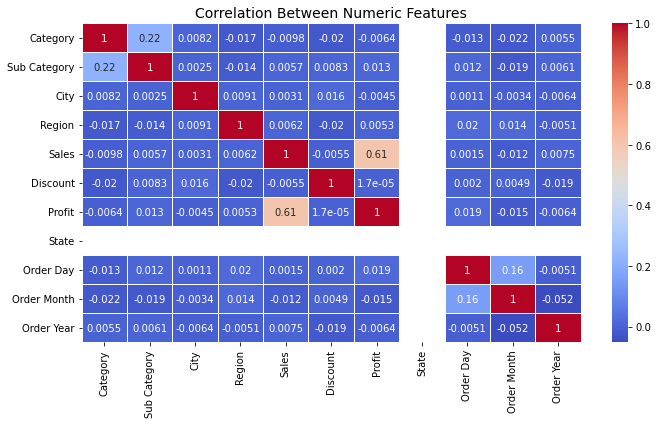

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()

# Machine Learning Model — Predict Sales

*  Feature Selection
* Train-Test Split
* Feature Scaling
*  Linear Regression Model
* Evaluate Model
* Actual vs Predicted 

In [55]:
X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])  # predictors
y = df['Sales']  

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()

In [61]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test_scaled)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [67]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Squared Error: 212968.92
R-squared (R²) Score: 0.35


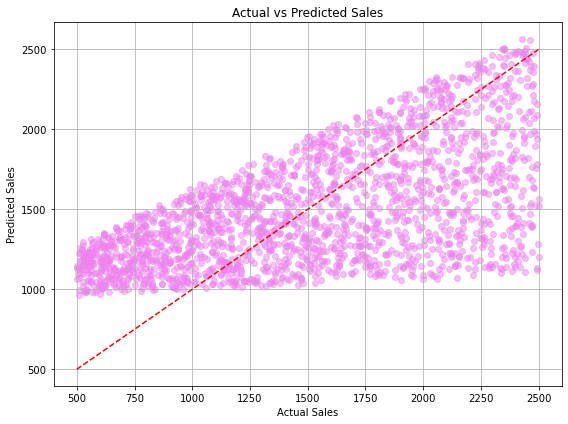

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='violet')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Train Random Forest 
Since linear regression is just a baseline, I want to build a Random Forest Regressor 
which can handle nonlinear relationships and feature interactions much better.

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [76]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [77]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [78]:
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R-squared (R²) Score: {r2_rf:.2f}")

Random Forest - Mean Squared Error: 218415.32
Random Forest - R-squared (R²) Score: 0.34


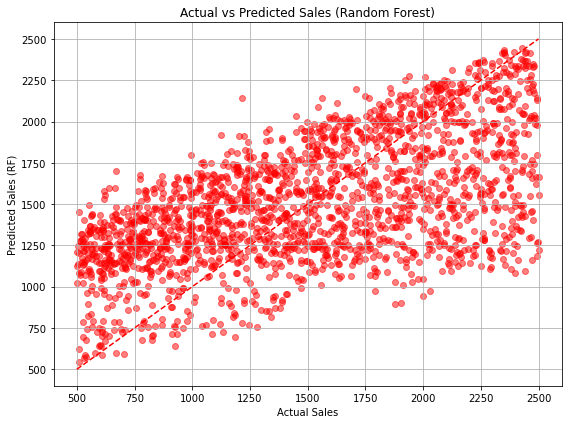

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (RF)')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance

In [81]:
import numpy as np

In [82]:
feature_names = X.columns

In [83]:
importances = rf_model.feature_importances_

In [84]:
indices = np.argsort(importances)[:-1]

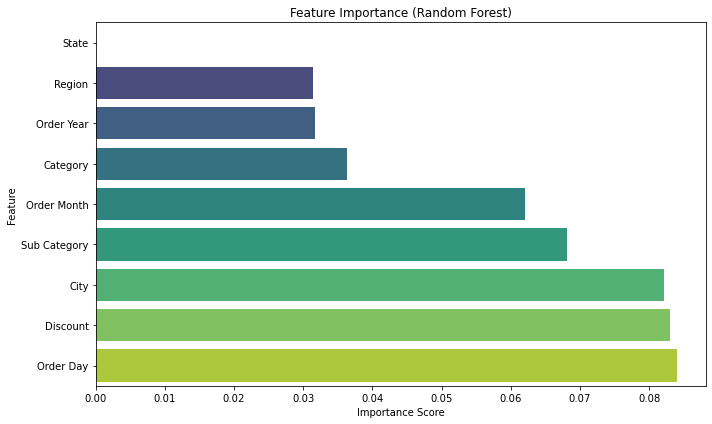

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Export New Dataset

In [86]:
df.columns = df.columns.str.replace(' ', '_')

In [87]:
df.to_csv("cleaned_supermarket_sales.csv", index=False)